# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [2]:
!pip install bs4

    100% |████████████████████████████████| 102kB 19.6MB/s a 0:00:01
  Running setup.py bdist_wheel for bs4 ... done
  Stored in directory: /home/lewi0332/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
#Starter Code

from bs4 import BeautifulSoup
import requests


url = 'https://www.azlyrics.com/j/joydivision.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [5]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [15]:
def grab_song_links(artist_page_url):

    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container

    #Get album divs
    albums = soup.find_all("div", class_="album")
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [6]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
url = 'https://www.azlyrics.com/lyrics/joydivision/disorder.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Disorder&quot; song by Joy Division: I\'ve been waiting for a guide to come and take me by the hand, Could these sensations make me feel t..." name="description"/>\n  <meta content="Disorder lyrics, Joy Division Disorder lyrics, Joy Division lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Joy Division - Disorder Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="https://

In [12]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Lyrics to &quot;Disorder&quot; song by Joy Division: I've been waiting for a guide to come and take me by the hand, Could these sensations make me feel t..." name="description"/>
  <meta content="Disorder lyrics, Joy Division Disorder lyrics, Joy Division lyrics" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>
  <title>
   Joy Division - Disorder Lyrics | AZLyrics.com
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5s

In [8]:
divs = soup.findAll('div')

In [9]:
div = divs[0]

In [10]:
for n, div in enumerate(divs):
    if "<!-- Usage of azlyrics.com content by any " in div.text:
        print(n)

In [11]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class" : "row"})
main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})

In [13]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nI've been waiting for a guide to come and take me by the hand,\nCould these sensations make me feel the pleasures of a normal man?\nThese sensations barely interest me for another day,\nI've got the spirit, lose the feeling, take the shock away.\n\nIt's getting faster, moving faster now, it's getting out of hand,\nOn the tenth floor, down the back stairs, it's a no man's land,\nLights are flashing, cars are crashing, getting frequent now,\nI've got the spirit, lose the feeling, let it out somehow.\n\nWhat means to you, what means to me, and we will meet again,\nI'm watching you, I'm watching her, I'll take no pity from your friends,\nWho is right, who can tell, and who gives a damn right now,\nUntil the spirit new sensation takes hold, then you know,\nUntil the spirit new sensation takes hold, then you know,\nUntil the spirit new sensation takes hold, then you know,\nI've got the spirit, but lose the feeling,\nI've got the spirit, but lose the feeling.\nFeeling, feeling, feeling

In [14]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [16]:
songs = grab_song_links("https://www.azlyrics.com/j/joydivision.html")
print(len(songs))
print(songs[0])

81
('Disorder', '../lyrics/joydivision/disorder.html', 'album: "Unknown Pleasures" (1979)')


In [29]:
import time
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")
    time.sleep(3)

In [24]:
print(lyrics)
print(songs[0][1])
print(url)

['N/A', 'N/A', 'N/A']
../lyrics/joydivision/disorder.html
https://www.azlyrics.coml


In [38]:
print(lyrics[8:10])

["\n\r\nI walked through the city limits,\nSomeone talked me in to do it,\nAttracted by some force within it,\nHad to close my eyes to get close to it,\nAround a corner where a prophet lay,\nSaw the place where she'd a room to stay,\nA wire fence where the children played.\nSaw the bed where the body lay,\nAnd I was looking for a friend of mine.\nAnd I had no time to waste.\nYeah, looking for some friends of mine.\n\nThe cars screeched hear the sound on dust,\nHeard a noise just a car outside,\nMetallic blue turned red with rust,\nPulled in close by the building's side,\nIn a group all forgotten youth,\nHad to think, collect my senses now,\nAre turned on to a knife edged view.\nFind some places where my friends don't know,\nAnd I was looking for a friend of mine.\nAnd I had no time to waste.\nYeah, looking for some friends of mine.\n\nDown the dark streets, the houses looked the same,\nGetting darker now, faces look the same,\nAnd I walked round and round.\nNo stomach, torn apart,\nNai

In [40]:
import numpy as np
np.savetxt("jdlyrics.csv", lyrics, delimiter=",", fmt='%s')

In [42]:
import pandas as pd

## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [43]:
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Disorder, ../lyrics/joydivision/disorder.html...",\n\r\nI've been waiting for a guide to come an...
1,"(Day Of The Lords, ../lyrics/joydivision/dayof...","\n\r\nThis is the room, the start of it all,\n..."
2,"(Candidate, ../lyrics/joydivision/candidate.ht...","\n\r\nForced by the pressure,\nThe territories..."
3,"(Insight, ../lyrics/joydivision/insight.html, ...",\n\r\nGuess your dreams always end.\nThey don'...
4,"(New Dawn Fades, ../lyrics/joydivision/newdawn...","\n\r\nA change of speed, a change of style.\nA..."


In [44]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Disorder, ../lyrics/joydivision/disorder.html...",\n\r\nI've been waiting for a guide to come an...,Disorder,../lyrics/joydivision/disorder.html,"album: ""Unknown Pleasures"" (1979)"
1,"(Day Of The Lords, ../lyrics/joydivision/dayof...","\n\r\nThis is the room, the start of it all,\n...",Day Of The Lords,../lyrics/joydivision/dayofthelords.html,"album: ""Unknown Pleasures"" (1979)"
2,"(Candidate, ../lyrics/joydivision/candidate.ht...","\n\r\nForced by the pressure,\nThe territories...",Candidate,../lyrics/joydivision/candidate.html,"album: ""Unknown Pleasures"" (1979)"
3,"(Insight, ../lyrics/joydivision/insight.html, ...",\n\r\nGuess your dreams always end.\nThey don'...,Insight,../lyrics/joydivision/insight.html,"album: ""Unknown Pleasures"" (1979)"
4,"(New Dawn Fades, ../lyrics/joydivision/newdawn...","\n\r\nA change of speed, a change of style.\nA...",New Dawn Fades,../lyrics/joydivision/newdawnfades.html,"album: ""Unknown Pleasures"" (1979)"


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [46]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]


the         16
feeling,     8
I've         5
a            4
lose         4
spirit,      4
got          4
spirit       3
me           3
new          3
dtype: int64

Text(0.5,1,'Top 10 Lyrics for Day Of The Lords')

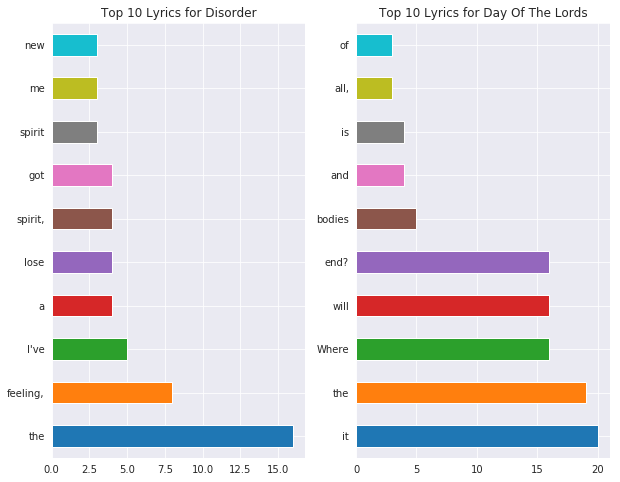

In [47]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!